<a href="https://colab.research.google.com/github/ThomBarros/Portfolio-website/blob/main/comp3710envir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import sys

# Add your absolute path of your project folder to system path.
sys.path.append("/content/drive/My Drive/COMP3710/assingment-one")

# See the full list of paths in sys.path
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython', '/content/drive/My Drive/COMP3710/assingment-one']


PyTorch Version: 2.3.1+cu121


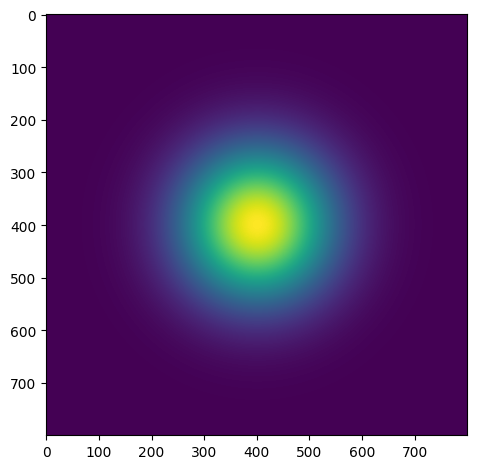

In [3]:
# Part One

import torch
import numpy as np

print("PyTorch Version:", torch.__version__)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute Gaussian
z = torch.exp(-(x**2+y**2)/2.0)

#plot
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()


PyTorch Version: 2.3.1+cu121


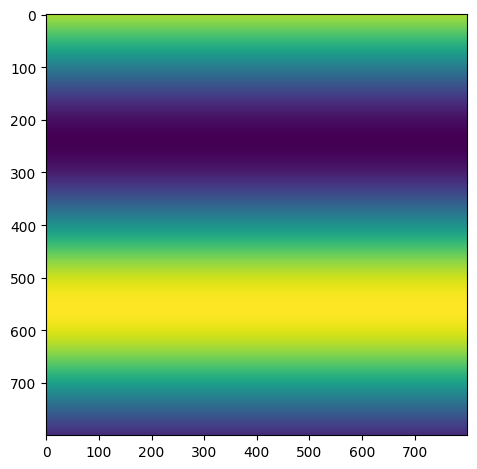

In [4]:
# Part One

import torch
import numpy as np

print("PyTorch Version:", torch.__version__)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute Gaussian
z = torch.sin(x)

#plot
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()


PyTorch Version: 2.3.1+cu121


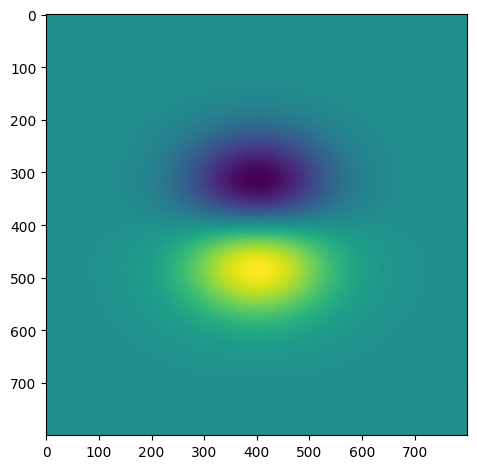

In [2]:
# Part One

import torch
import numpy as np

print("PyTorch Version:", torch.__version__)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute Gaussian
z = torch.sin(x) * torch.exp(-(x**2+y**2)/2.0)

#plot
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()


<ipython-input-13-1579f8b6c32d>:47: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


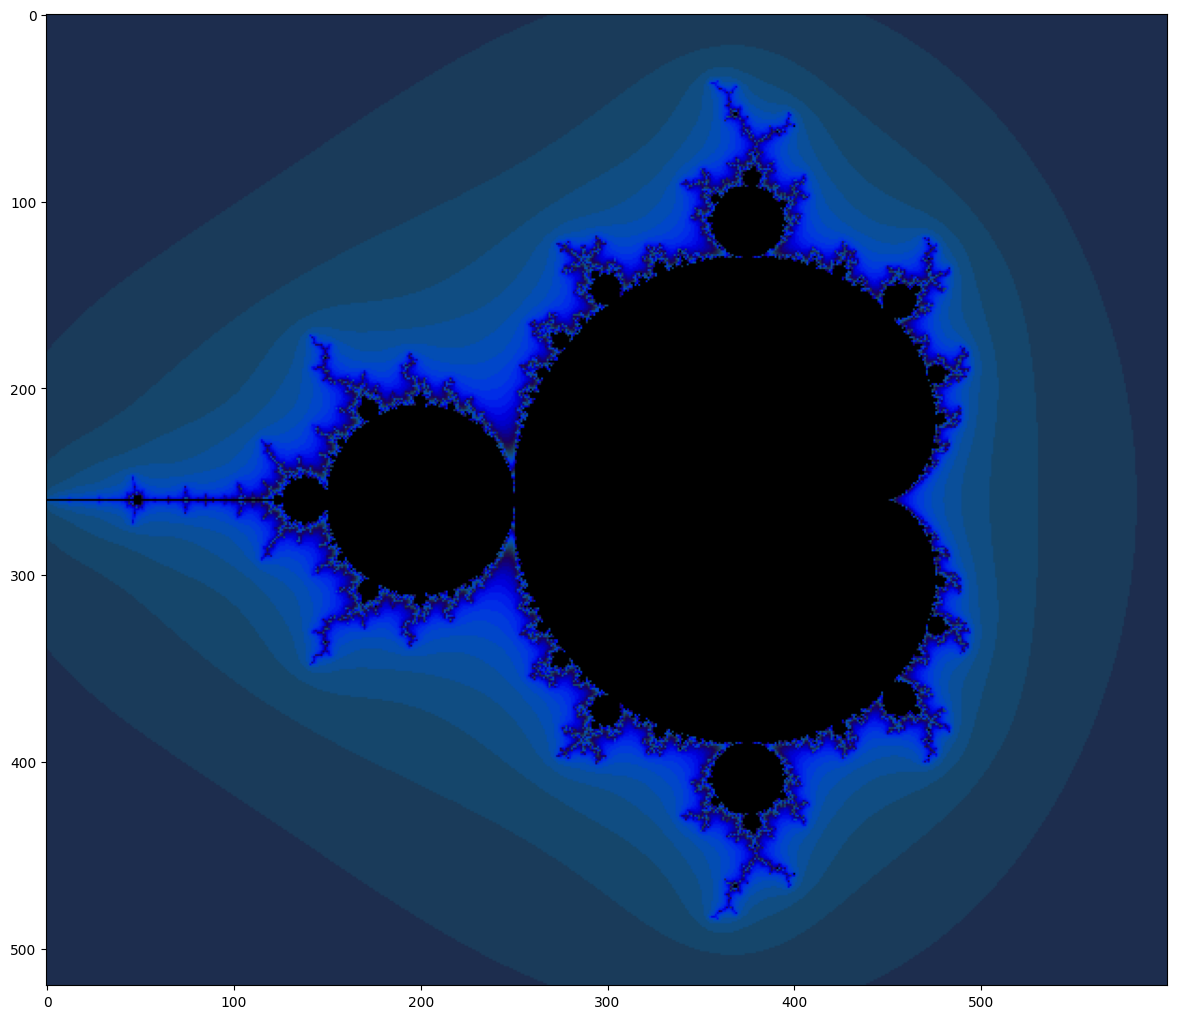

In [ ]:
# Part Two

import torch
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]


# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a


plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

<ipython-input-1-6f163aa4950c>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


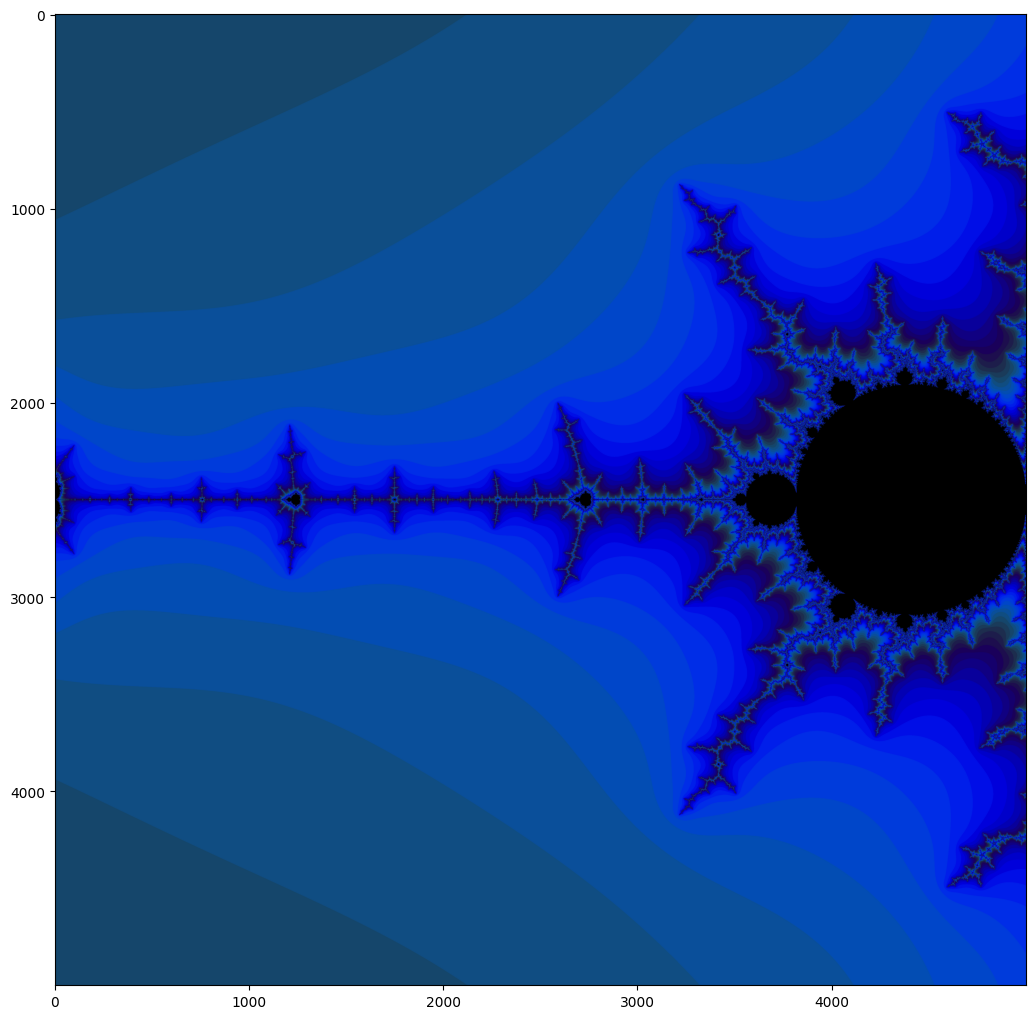

In [1]:
import torch
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use NumPy to create a 2D array of complex numbers on [-0.75, -0.25]x[-0.25, 0.25]
# This will zoom into the area around the point (-0.5, 0)
Y, X = np.mgrid[-0.25:0.25:0.0001, -1.75:-1.25:0.0001]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)  # important!
zs = z.clone()  # Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# Mandelbrot Set
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs * zs + z
    # Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    # Update variables to compute
    ns += not_diverged
    zs = zs_

# plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 10))

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

<ipython-input-9-1d13b876ef0a>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


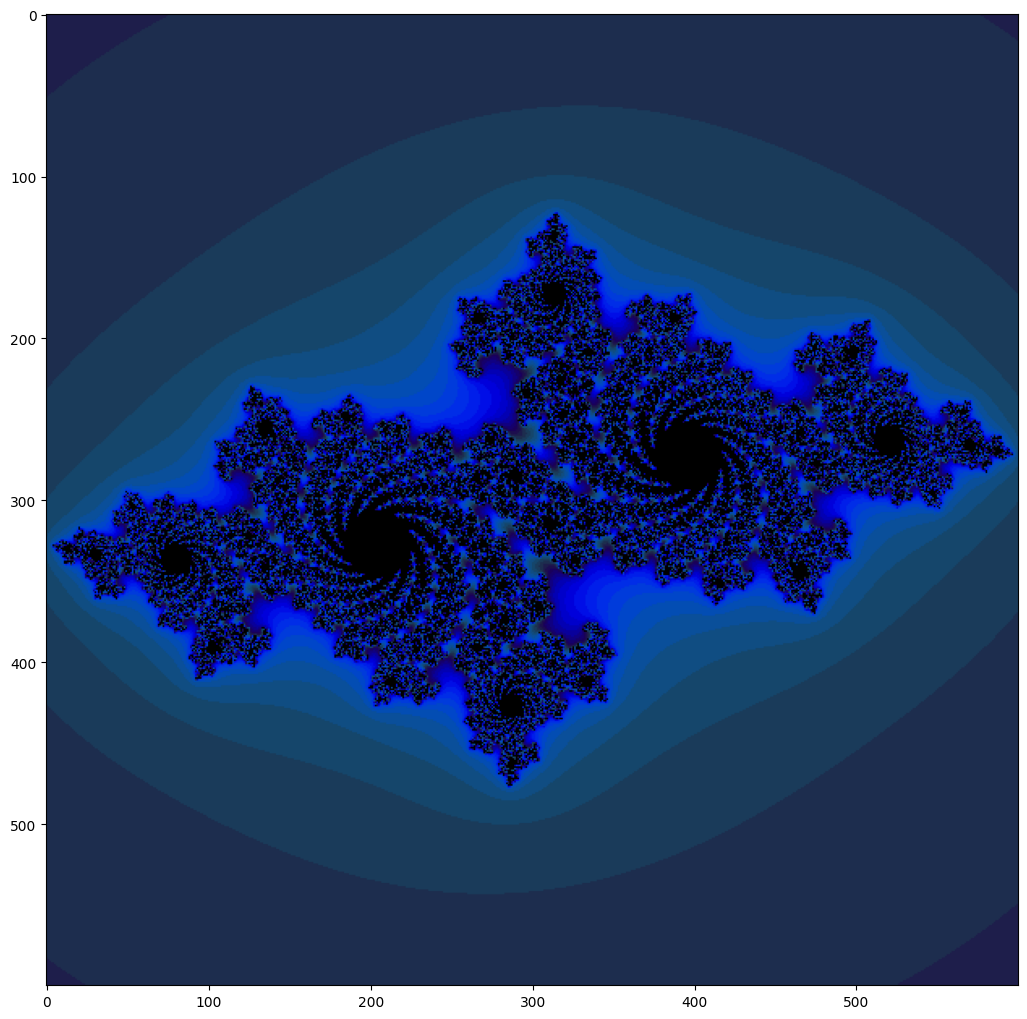

In [9]:
import torch
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use NumPy to create a 2D array of complex numbers on [-0.75, -0.25]x[-0.25, 0.25]
# This will zoom into the area around the point (-0.5, 0)
Y, X = np.mgrid[-1.5:1.5:0.005, -1.5:1.5:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)  # important!
zs = z.clone()  # Updated!
ns = torch.zeros_like(z)

# Choose a constant complex number for the Julia set
c = torch.complex(torch.tensor(-0.7), torch.tensor(0.27015))

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)
c = c.to(device)

# Julia Set
for i in range(200):
    #  z: z^2 + c
    zs_ = zs * zs + c
    # check if values diverged
    not_diverged = torch.abs(zs_) < 4.0
    # update variables
    ns += not_diverged
    zs = zs_

# Plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 10))

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()


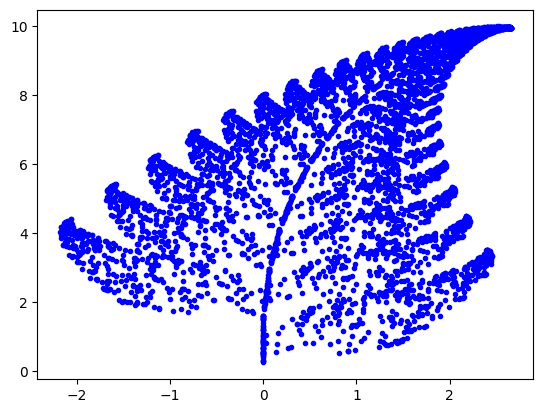

In [6]:
# Simple implementation of Barnsley's fern, without parallelism with Pytorch

import torch
import numpy as np
import matplotlib.pyplot as plt


# Basic implementation
iterations = 5000
x = 0.0
y = 0.0
t = 0.0
xn = 0.0
yn = 0.0
while t < iterations:
    r = np.random.random()
    if r < 0.01:
        xn = 0.0
        yn = 0.16*y
    elif r < 0.86:
        xn = 0.85*x + 0.04*y
        yn = -0.04*x + 0.85*y + 1.6
    elif r < 0.93:
        xn = 0.2*x - 0.26*y
        yn = 0.23*x + 0.22*y + 1.6
    else:
        xn = -0.15*x + 0.28*y
        yn = 0.26*x + 0.24*y + 0.44
    plt.plot(xn, yn, "b.")
    x = xn
    y = yn
    t += 1


plt.show()

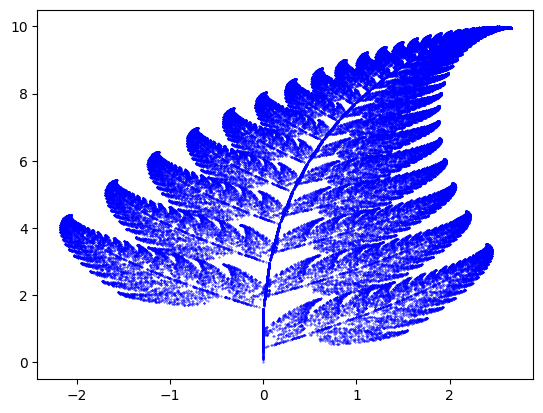

In [2]:
# Advanced implementation of Barnsley fern, using PyTorch

import torch
import matplotlib.pyplot as plt

# Number of points
iterations = 100000

# Initialize tensors for x and y coordinates
x = torch.zeros(iterations) # initialise all x values to 0
y = torch.zeros(iterations) # initialise all y values to 0

# get random probability (between 0 and 1) for each iteration
r = torch.rand(iterations)

# Apply the transformation rules using PyTorch tensor operations
for i in range(1, iterations):
    x_prev, y_prev = x[i-1], y[i-1] # transformations are based on previous points

    # Masks for probabilities (bools) which aligns with probability of each transformation
    condit_1 = r[i] < 0.01 # Transform 1 1% of the time
    condit_2 = (r[i] >= 0.01) & (r[i] < 0.86) # Transform 2 85% of the time
    condit_3 = (r[i] >= 0.86) & (r[i] < 0.93) # Transform 3 7% of the time
    #condit_4 = r[i] >= 0.93
    # Note: Transform 4 7% of the time

    # .where takes a condition and an output if the condition is true, and and other if condition is false
    # recursively (?) check each condition and
    x[i] = torch.where(condit_1, 0.0, torch.where(condit_2, 0.85*x_prev + 0.04*y_prev, torch.where(condit_3, 0.2*x_prev - 0.26*y_prev, -0.15*x_prev + 0.28*y_prev)))

    y[i] = torch.where(condit_1, 0.16*y_prev, torch.where(condit_2, -0.04*x_prev + 0.85*y_prev + 1.6, torch.where(condit_3, 0.23*x_prev + 0.22*y_prev + 1.6, 0.26*x_prev + 0.24*y_prev + 0.44)))

# Plot points as a scatter plot
plt.scatter(x.numpy(), y.numpy(), color='b', s=0.1) # .numpy() returns Tensor as a numpy array
plt.show()
